# Tidier Course: What is Tidier.jl?

<img src="https://raw.githubusercontent.com/TidierOrg/.github/main/profile/TidierOrg_logo.png" align="left" style="padding-right:10x;" width="150"/>

## A brief introduction to the tidyverse

The tidyverse is a package (or more accurately, a collection of packages) for data transformation, reshaping, and visualization that was implemented in the R programming language. The tidyverse package was named in the 2022 Stack Overflow as the #22 most popular framework across all programming languages (Source: [https://survey.stackoverflow.co/2022#most-popular-technologies-misc-tech](https://survey.stackoverflow.co/2022#most-popular-technologies-misc-tech).

The tidyverse popularized the use of [data pipelines](data-pipelines/data-pipelines.ipynb). The building blocks of data pipelines are functions that take in a dataset, transform it, and then return a dataset. Each function is simple in that it only aims to perform one task, but the beauty of using data pipelines is that multiple functions can be chained together to perform complex data transformations. This style of programming was popularized by the tidyverse, and it looks something like this:

```r
patients |>
  group_by(takes_medications) |>
  summarize(age = mean(age))
```

The `|>` is a pipe operator in R (similar to Julia). Because each function in this code accepts a dataset as its first argument, it can written in this way, which has the added benefit that the code can be read aloud, like this:

Start with the **patients** dataset, *then*
**group by** whether or not they take medications, *then*
**summarize** their age by taking the mean.

Since each function in the above code transforms the dataset in a specific way, functions in tidyverse are often referred to as "data verbs," or just "verbs." Tidyverse has simple verbs like the `group_by()` and `summarize()` verbs above, and it has complex verbs like `count()` that combine the functionality of `group_by()` followed by a `summarize()` into a single function.

The verbs from tidyverse have proven so popular that they've led to [multiple implmentations across multiple programming languages](tidyverse-and-its-descendants/tidyverse-and-its-descendants.ipynb). The tidyverse isn't limited to data transformation only. There are functions within the tidyverse geared towards generating plots and standardizing the syntax for working with strings, categorical variables, in dates. In short, if there's a data-oriented task you can think of, there's probably a tidy way of accomplishing it.

## So what does all this mean for Julia?

Tidier.jl is a Julia implementation of the tidyverse package. Tidier.jl aims to fully recreate the experience of using the tidyverse in Julia, and to bring the maximal power of the Julia ecosystem for users by relying behind-the-scenes on first-class Julia packages like DataFrames.jl, Makie, and AlgebraOfGraphics.

Similar to the tidyverse, Tidier.jl is also a (growing) collection of multiple packages:

- `TidierData.jl`: for transforming, summarizing, and reshaping data
- `TidierPlots.jl`: for plotting data
- `TidierCats.jl`: for working with categorical variables
- `TidierDates.jl`: for working with dates
- `TidierStrings.jl`: for working with strings
- `TidierText.jl`: for working with text
- `TidierVest.jl`: for harvesting website data

Before we talk any more about how Tidier.jl works, let's start with an example of Tidier.jl in action.

In [4]:
using Tidier
using ZipFile, CSV, Dates

# If not already downloaded,
# Download the MITRE Synthea synthetic data zip file containing multiple .csv files
if !("data.zip" in readdir())
    location = download("https://mitre.box.com/shared/static/aw9po06ypfb9hrau4jamtvtz0e5ziucz.zip", "data.zip")
end
zip_file = ZipFile.Reader("data.zip")

ZipFile.Reader for IOStream(<file data.zip>) containing 19 files:

uncompressedsize method  mtime            name
----------------------------------------------
               0 Store   2021-11-19 13-06 csv/
        13673971 Deflate 2021-11-19 13-07 csv/medications.csv
          907006 Deflate 2021-11-19 13-07 csv/providers.csv
         9063419 Deflate 2021-11-19 13-07 csv/payer_transitions.csv
        52789219 Deflate 2021-11-19 13-07 csv/imaging_studies.csv
          225894 Deflate 2021-11-19 13-07 csv/supplies.csv
            2205 Deflate 2021-11-19 13-07 csv/payers.csv
        42228906 Deflate 2021-11-19 13-07 csv/claims.csv
          142724 Deflate 2021-11-19 13-07 csv/allergies.csv
        15670859 Deflate 2021-11-19 13-07 csv/procedures.csv
          155989 Deflate 2021-11-19 13-07 csv/organizations.csv
         5038396 Deflate 2021-11-19 13-07 csv/conditions.csv
          757276 Deflate 2021-11-19 13-07 csv/careplans.csv
        19062151 Deflate 2021-11-19 13-07 csv/encounters.

In [5]:
# Load the patients data frame
patients = CSV.read(zip_file.files[18], DataFrame);

# Load the medications data frame
meds = CSV.read(zip_file.files[2], DataFrame);

## Let's take a look at the `patients` data frame

Now that our datasets are loaded from the zip file, let's start by taking a look at the `patients` data frame. We can take get a general feel of the dimensions of the data frame, as well as the first few values for each column, using the `@glimpse()` macro.

In [25]:
@glimpse(patients)


Rows: 1163
Columns: 25


.id            String         b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85, c1f1fcaa-82f
.birthdate     Date           2019-02-17, 2005-07-04, 1998-05-11, 2003-01-28, 19
.deathdate     Union{Missing, Date}missing, missing, missing, missing, missing, 
.ssn           String15       999-65-3251, 999-49-3323, 999-10-8743, 999-56-6057


.drivers       Union{Missing, String15}missing, S99941126, S99996708, S99929424,
.passport      Union{Missing, String15}missing, missing, X75063318X, missing, X4
.prefix        Union{Missing, String7}missing, missing, Mr., Ms., Mr., missing, 
.first         String31       Damon455, Thi53, Chi716, Phillis443, Jerrold404, B
.last          String31       Langosh790, Wunsch504, Greenfelder433, Walter473, 
.suffix        Union{Missing, String3}missing, missing, missing, missing, missin
.maiden        Union{Missing, String31}missing, missing, missing, missing, missi
.marital       Union{Missing, String1}missing, missing, missing, missing, M, mis
.race          String15       white, white, white, white, black, white, black, w
.ethnicity     String15       nonhispanic, nonhispanic, nonhispanic, nonhispanic


.gender        String1        M, F, M, F, M, F, M, M, F, M, F, F, F, F, F, F, F,
.birthplace    String         Middleborough  Massachusetts  US, Danvers  Massach
.address       String         620 Lynch Tunnel Apt 0, 972 Tillman Branch Suite 4
.city          String31       Springfield, Bellingham, Boston, Hingham, Revere, 
.state         String15       Massachusetts, Massachusetts, Massachusetts, Massa
.county        String31       Hampden County, Norfolk County, Suffolk County, Pl
.zip           Union{Missing, Int64}1104, missing, 2131, 2043, missing, missing,
.lat           Float64        42.08038942501558, 42.03521335752818, 42.292556623
.lon           Float64        -72.48043144917739, -71.48251904737748, -71.061160
.healthcare_expensesFloat64        9039.1645, 402723.415, 571935.8725, 582557.80
.healthcare_coverageFloat64        7964.1255, 14064.135000000002, 787.5374999999


In [36]:
@chain patients @clean_names() @glimpse()

Rows: 1163
Columns: 25
.id            String         b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85, c1f1fcaa-82f
.birthdate     Date           2019-02-17, 2005-07-04, 1998-05-11, 2003-01-28, 19
.deathdate     Union{Missing, Date}missing, missing, missing, missing, missing, 
.ssn           String15       999-65-3251, 999-49-3323, 999-10-8743, 999-56-6057
.drivers       Union{Missing, String15}missing, S99941126, S99996708, S99929424,
.passport      Union{Missing, String15}missing, missing, X75063318X, missing, X4
.prefix        Union{Missing, String7}missing, missing, Mr., Ms., Mr., missing, 
.first         String31       Damon455, Thi53, Chi716, Phillis443, Jerrold404, B
.last          String31       Langosh790, Wunsch504, Greenfelder433, Walter473, 
.suffix        Union{Missing, String3}missing, missing, missing, missing, missin
.maiden        Union{Missing, String31}missing, missing, missing, missing, missi
.marital       Union{Missing, String1}missing, missing, missing, missing, M, mis
.race

In [6]:
@chain meds @clean_names() @glimpse()

Rows: 56430
Columns: 13
.start         String31       2020-02-17T10:40:32Z, 2020-02-17T10:40:32Z, 2013-0


.stop          Union{Missing, String31}missing, missing, 2013-07-02T06:39:19Z, 2
.patient       String         b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85, b9c610cd-28a
.payer         String         7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a, 7c4411ce-02f
.encounter     String         01efcc52-15d6-51e9-faa2-bee069fcbe44, 01efcc52-15d
.code          Int64          1014676, 1870230, 1043400, 198405, 313820, 849574,
.description   String         cetirizine hydrochloride 5 MG Oral Tablet, NDA0208


.base_cost     Float64        21.45, 231.58, 7.59, 12.48, 4.77, 9.25, 227.63, 4.
.payer_coverageFloat64        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
.dispenses     Int64          21, 21, 1, 1, 3, 1, 5, 1, 12, 341, 281, 12, 371, 3
.totalcost     Float64        450.45, 4863.18, 7.59, 12.48, 14.31, 9.25, 1138.15


.reasoncode    Union{Missing, Int64}missing, missing, 10509002, missing, missing
.reasondescriptionUnion{Missing, String}missing, missing, Acute bronchitis (diso


In [7]:
patients = @chain patients @clean_names();
meds = @chain meds @clean_names();

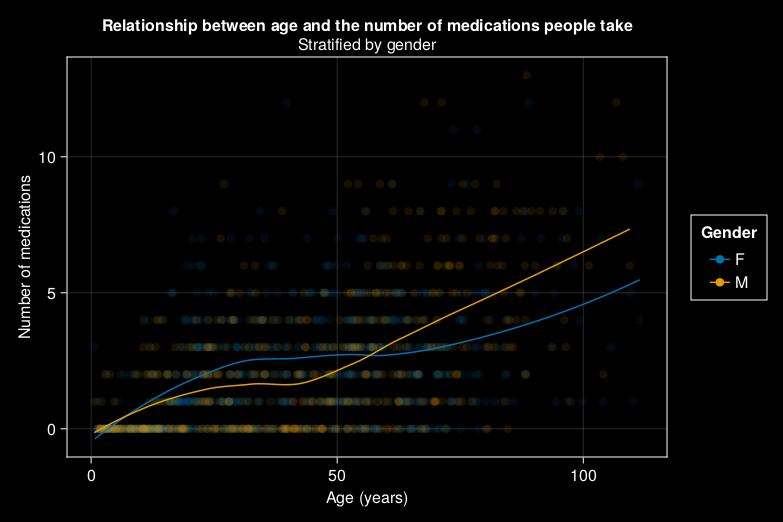

ggplot options


subtitle: Stratified by gender
height: 400
x: Age (years)
color: Gender
title: Relationship between age and the number of medications people take
width: 600
y: Number of medications

geom_point
data: inherits from plot
x: not specified 
y: not specified 

geom_smooth
data: inherits from plot
x: not specified 
y: not specified 



In [26]:
@chain meds begin
    @rename(id = patient)
    @filter(ismissing(stop))
    @group_by(id)
    @summarize(num_meds = n())
    @left_join(patients, _)
    @mutate(num_meds = replace_missing(num_meds, 0))
    @mutate(today = mdy("01-01-2023"))
    @mutate(age = if_else(!ismissing(deathdate) && deathdate < today,
                          deathdate - birthdate,
                          today - birthdate))
    @mutate(age = Dates.days(age)/365.25)
    ggplot(@aes(x = age, y = num_meds, color = gender))
    geom_point(alpha = 1/10)
    geom_smooth()
    labs(title = "Relationship between age and \
                  the number of medications people take",
         subtitle = "Stratified by gender",
         x = "Age (years)",
         y = "Number of medications",
         color = "Gender")
    theme_black()
end